#Introducción a Machine Learning con Scikit-Learn

In [1]:
!pip install scikit-learn==1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Un primer ejemplo.

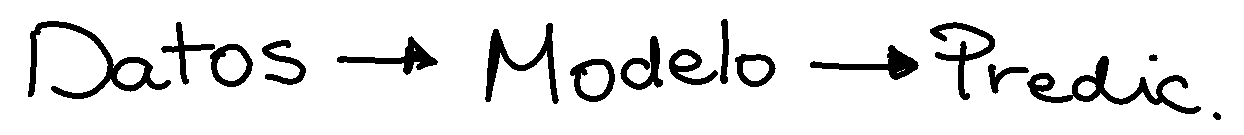
En este caso los datos con los que trabajaremos será un conjunto de datos que scikit-learn tiene integrado para fines educativos: https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset. Este dataset esta compuesto por 14 categorías diferentes con información sobre la vivienda y el entorno, entre ellas el precio que será la variable que deseamos predecir. Para ello ejecutamos el siguiente código:

Para mayor comódidad integramos los datos en un dataframe de Pandas. Esto nos permitirá aplicar las técnicas de data-wrangling con Pandas vistas previamente.

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()
df= pd.DataFrame(data=np.c_[boston['data'], boston['target']],
                 columns=np.append(boston['feature_names'], 'TARGET'))
df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


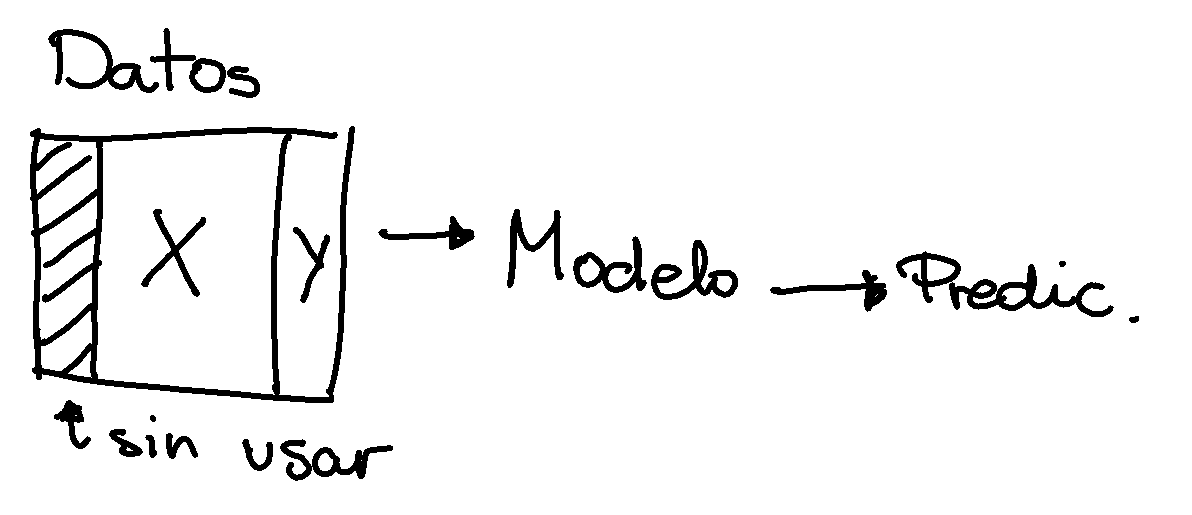A lo largo de esta introducción utilizaremos modelos basados en el aprendizaje supervisado, por lo que debemos dividir nuestros datos. Nuestro conjunto debe tener los datos desde los que aprender, que llamaremos X, y el resultado que tiene que dar dichos datos, que llamaremos Y. Esta denominación de X e Y se realiza por convenio.



In [4]:
X=np.array(df.drop('TARGET',axis=1))
Y=np.array(df['TARGET'])

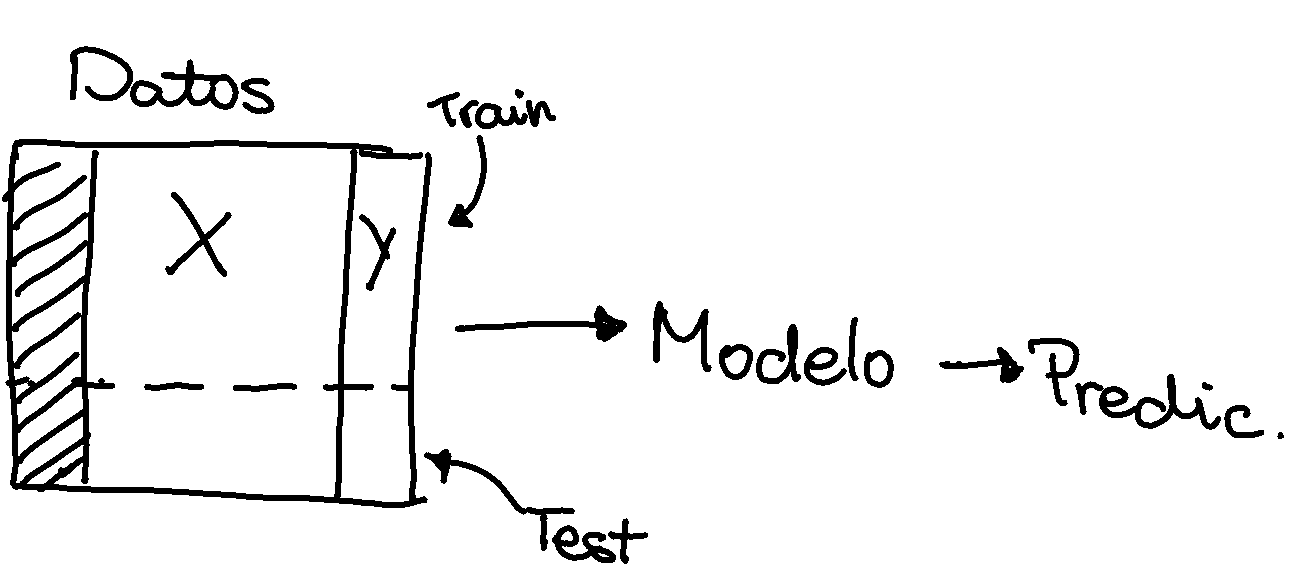
Como hemos comentado previamente entrenar el modelo con todo el conjunto de datos puede dar problemas, así pues haremos una división de nuestros datos en dos conjuntos: Train y Test. Para ello Scikit-learn tiene una función que lo permite hacer de forma muy cómoda, `train_test_split`. Los argumentos de esta función son X, Y y la proporción que se desea asignar a test, en este caso un 20%. El argumento `random_state` es un argumento opcional que asegura que la división entre train y test coincide en cada ejecución, así todos los alumnos obtienen resultados iguales.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=11)

El modelo que utilizaremos en esta sección será uno que posteriormente veremos con mayor profundidad, el KNN, KNearestNeighbor.

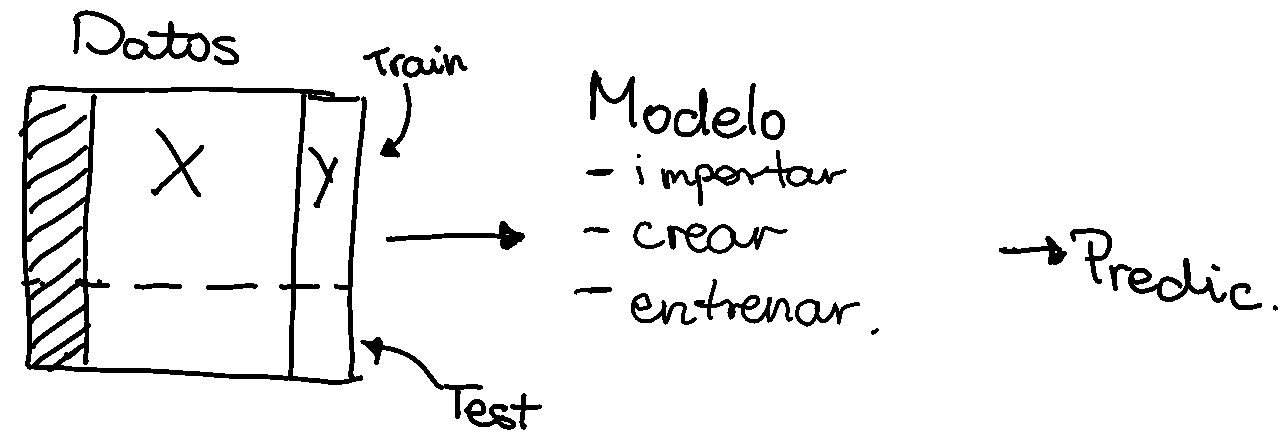
Aparte de importarlo, debemos crear una instancia del modelo y entrenar dicha instacia. Para crear una instancia simplemente debemos asignar el modelo a una variable y para entrenarla usaremos el método `.fit()`. Como deseamos entrenar con los datos de entrenamiento el método será:`.fit(X_train,Y_train)`

In [13]:
from sklearn.neighbors import KNeighborsRegressor # PASO 0 Importar el modelo
modelo = KNeighborsRegressor() # PASO 1 Inicializar el modelo
modelo.fit(X_train, Y_train) # PASO 2 Entrenar el modelo

KNeighborsRegressor()

En este momento nuestro modelo ya se encuentra entrenado y listo para realizar predicciones. La clase `modelo` tiene el método `.predict()`. Para predecir los valores test el método será `predict(X_test)`

<Axes: >

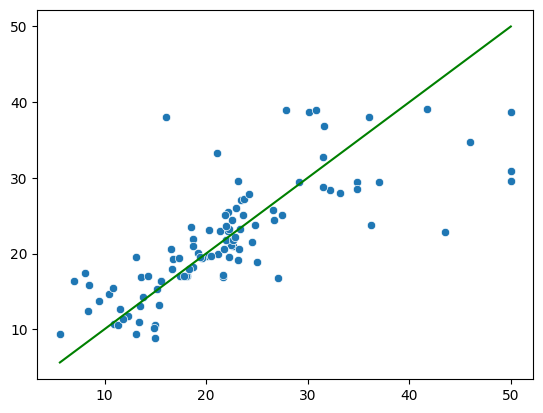

In [14]:
Y_prediction=modelo.predict(X_test) # PASO 3 Predecir
sns.scatterplot(x=Y_test,y=Y_prediction) # GRÁFICA PUNTOS
sns.lineplot(x=Y_test,y=Y_test,color='green') # GRáFICA LINEA

En la gráfica anterior podemos observar en el eje de abscisas el valor original del test y el eje de ordenadas el valor de la predicción. Si el modelo funcionase perfectamente esta linea debería haber sido una diagonal perfecta, no es el caso. Por ejemplo, en la gráfica se muestran varias viviendas con un coste de 50 mil dolares, pero ninguna de ellas es valorada por mas de 40 mil. Esta diferencia es más que significativa, un error de un 20% o 30% es abismal en términos de machine learning. Veamos como podemos mejorar nuestro modelo.

### Ejercicio 1


En este momento ya debes ser capaz de enteder la estructura mas sencilla de un flujo de trabajo con Scikit-learn. El anterior modelo era un KNN, pero Scikit-learn contiene cientos más, entre ellos la regresión lineal.
Utilizando los conjuntos de entrenamiento y test anteriores entrena un modelo de regresión lineal (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (Llámalo `modelo2`)
Realiza la predicción del conjunto test ( `Y_predicition2`) y representa la predicción gráficamente mediante un ScatterPlot. ¿Qué modelo dirías que ha funcionado mejor?

<Axes: >

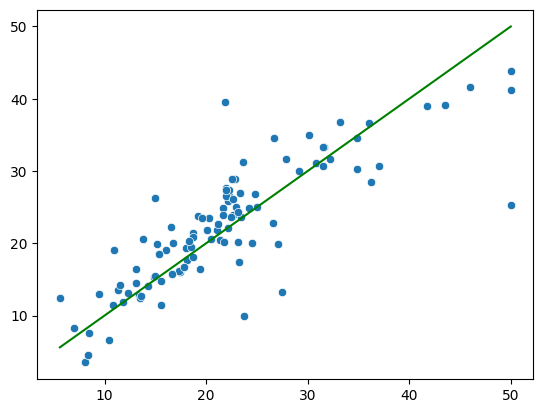

In [12]:
#Escribe aquí tu solución
#copiado de arriba para que me sea mas facil
#from sklearn.neighbors import KNeighborsRegressor # PASO 0 Importar el modelo
#modelo = KNeighborsRegressor() # PASO 1 Inicializar el modelo
#modelo.fit(X_train, Y_train) # PASO 2 Entrenar el modelo
# Y_prediction=modelo.predict(X_test) # PASO 3 Predecir
# sns.scatterplot(x=Y_test,y=Y_prediction) # GRÁFICA PUNTOS
# sns.lineplot(x=Y_test,y=Y_test,color='green') # GRáFICA LINEA


# 1. Importar el modelo del link
from sklearn.linear_model import LinearRegression
# 2. Inicializar modelo
modelo2 = LinearRegression ()
# 3. Entrenar
modelo2.fit(X_train, Y_train)
# 4. Predecir
Y_prediction2=modelo2.predict(X_test)
# 5. Grafica
sns.scatterplot(x=Y_test,y=Y_prediction2)
# 6. Grafica
sns.lineplot(x=Y_test,y=Y_test,color='green')

## ¿Cómo mejorar nuestro modelo?

Para saber como mejorar los resultados debemos entender como funcionan los modelos, de ahí que los estudiemos con mayor profundidad posteriormente. Aún así, realizaremos aquí una explicación muy básica del funcionamiento del KNN.

Para la explicación simplificaremos un poco nuestro problema, digamos que queremos predecir el precio de la vivienda basándonos en el número de metros cuadrados y la distancia al centro. Podemos visualizar los datos de la siguiente forma:

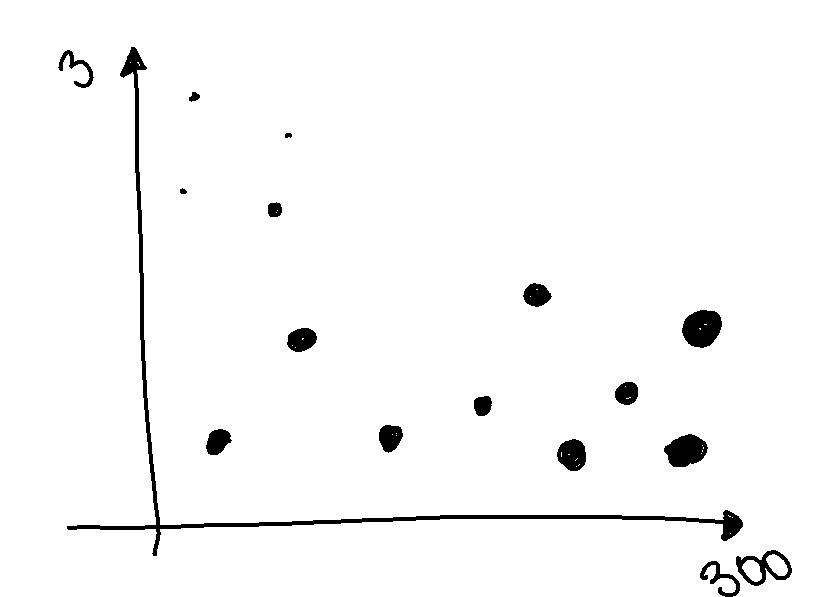ç

Donde el eje horizontal són los métros cuadrados, el eje vertical los km de distancia al centro y el tamaño del punto es el precio.

Digamos que insertamos un nuevo punto, por ejemplo el siguiente:

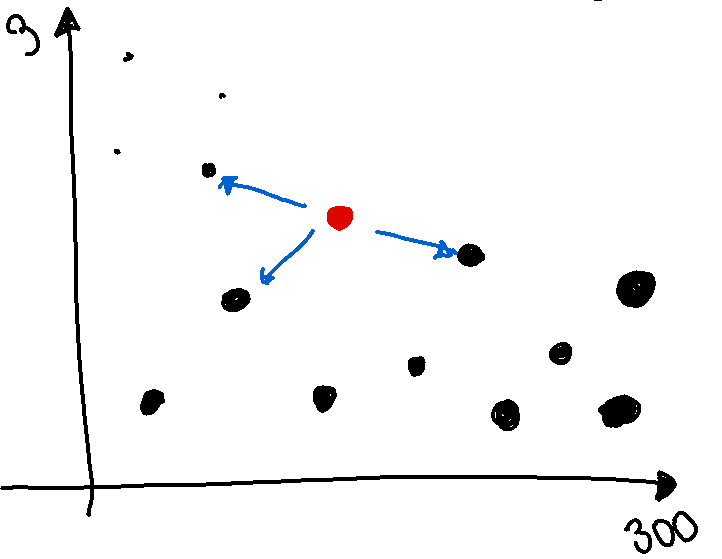

La forma en la que el algoritmo de KNN funciona es el siguiente, mira el número(a este número hace referencia la K) de vecinos (neigbors) más cercanos (nearest) y calcula el valor basándose en el valor de estos únicamente.

Ahora pues, digamos que en lugar de tener la distancia al centro en km esta en metros, los datos tendrían una forma mas similar a la siguiente:

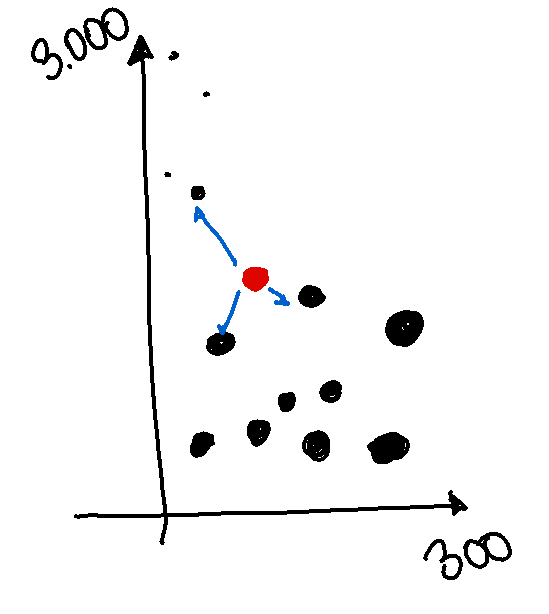

Y por tanto el valor que se le da el valor a cada vecino es diferente.
Este problema se le conoce como un problema de escala, y es que si nos fijamos cada eje toma valores en un rango diferente, el vertical entre 0 y 3km mientras que el horizontal entre 0 y 300 m^2. Para arreglar estos problemas realizaremos lo que se conoce como la estandarización de los datos.


***

Ahora pues, habrá que añadir este paso a nuestro flujo de trabajo. Este tipo de modificaciones se realizan previas al entrenamiento y se les conoce como prepocesamiento, *preprocessing*. Este procedimiento se puede automatizar mediante una *pipeline* :

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
# PASO 1 Inicializar el modelo
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

Entonces el flujo de trabajo tomaría una forma mas similar al siguiente:


<Axes: >

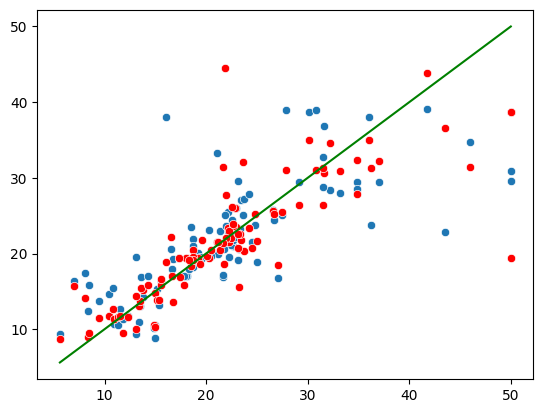

In [18]:
pipe.fit(X_train,Y_train) # PASO 2 Entrenar el modelo
Y_prediction_pipe=pipe.predict(X_test) # PASO 3 Predecir
sns.lineplot(x=Y_test,y=Y_test,color='green')  # GRáFICA LINEA EJERCICIO 1
sns.scatterplot(x=Y_test,y=Y_prediction) # GRÁFICA PUNTOS EJERCICIO 1
sns.scatterplot(x=Y_test,y=Y_prediction_pipe, color='red') # GRÁFICA PUNTOS EJERCICIO 2

Observemos que los valores centrales se encuentran mas cercanos a la recta verte en la predicción roja que la azul, significando esto que nuestra predicción es mejor para estos valores. Por otro lado, si nos fijamos en los valores del extremo derecho la dispersión parece ser algo mayor. Existe la posibilidad de que estos valores sean valores extremos 'outliers' y por tanto esten adulterando nuestra predicción haciendola peor de lo que debería ser, también existe la posibilidad de que nuestro modelo no sea mejor. Posteriormente veremos como cuantificar la mejora de nuestro modelo aparte de mirarlo a ojo. Pero hagamos un pequeño inciso para hablar de la importancia de los conjuntos train y test.

### Ejercicio 2

En en el ejercicio anterior hemos creado un modelo de regresión, pero este también puede estar afectado por las diferencias de ecala. Crea un nuevo pipeline llamado `pipe2` donde se aplica un escalado de estandarización a un modelo de regresión. Representa la nueva predicción `Y_prediction_pipe2` y la antigua `Y_prediction2` y argumenta si la predicción ha mejorado.




<Axes: >

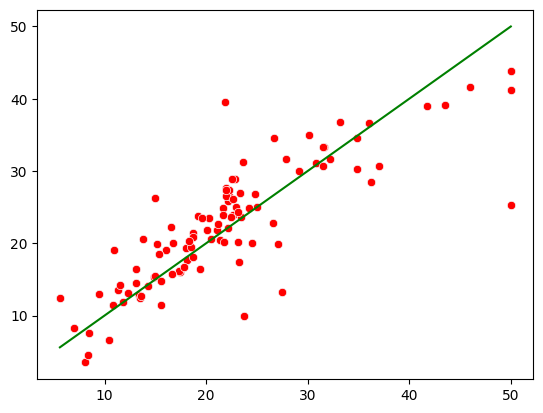

In [21]:
#Escribe aquí tu solución


# PASO 1 Inicializar el modelo
pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
    ])
# PASO 2 Entrenar el modelo
pipe2.fit(X_train,Y_train)
# PASO 3 Predecir
Y_prediction_pipe2=pipe2.predict(X_test)
# GRáFICA LINEA
sns.lineplot(x=Y_test,y=Y_test,color='green')
# GRÁFICA PUNTOS EJERCICIO 1
sns.scatterplot(x=Y_test,y=Y_prediction2)
# GRÁFICA PUNTOS EJERCICIO 2
sns.scatterplot(x=Y_test,y=Y_prediction_pipe2, color='red')

#no salen los puntos azules xq estan justo debajo de los rojos, los dos modelos predicen los mismo resultados


# La importancia de los conjuntos test y train.

Hasta ahora hemos asumido que debe dividirse el conjunto en test y train por la explicación realizada en teoría, no puedes probar el modelo en datos nuevos si no hay datos nuevos, pero veamos un ejemplo de como esto puede afectar a nuestro modelo.
Entrenemos un modelo con todos los datos y veamos si es capaz de realizar mejores predicciones.

<Axes: >

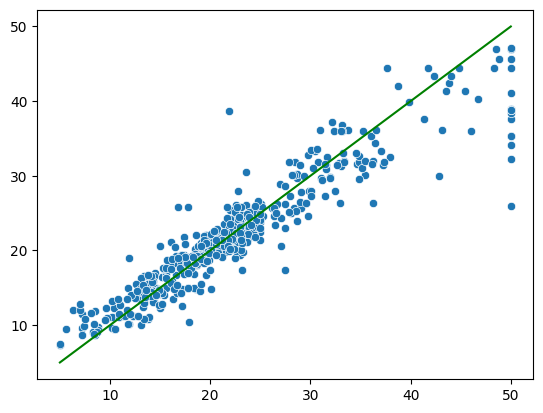

In [22]:
pipe_total = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pipe_total.fit(X, Y)
Y_prediction_total=pipe_total.predict(X)
sns.scatterplot(x=Y,y=Y_prediction_total)
sns.lineplot(x=Y,y=Y,color='green')

Dado que hemos utilizado el conjunto entero para realizar el entrenamiento y la predicción tenemos mucha mas información y parece que sea una mejor predicción. Comparemos la predicción del conjunto Y_test con las predicciones anteriores.

<Axes: >

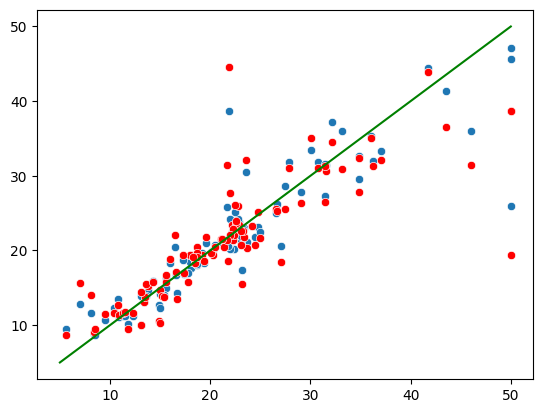

In [23]:
Y_prediction_total_test=pipe_total.predict(X_test)
sns.scatterplot(x=Y_test,y=Y_prediction_total_test)
sns.scatterplot(x=Y_test,y=Y_prediction_pipe,color='red')
sns.lineplot(x=Y,y=Y,color='green')

Observemos que la mayoría de puntos, especialmente aquellos de los extremos se, encuentran mas cerca de la recta en la predicción azul, que coincide con la realizada por el modelo entrenado con todos los datos. Vamos a exajerar este fenómeno para ver que esta sucediendo con los datos, para ello vamos a modificar un hyperparámetro.

<Axes: >

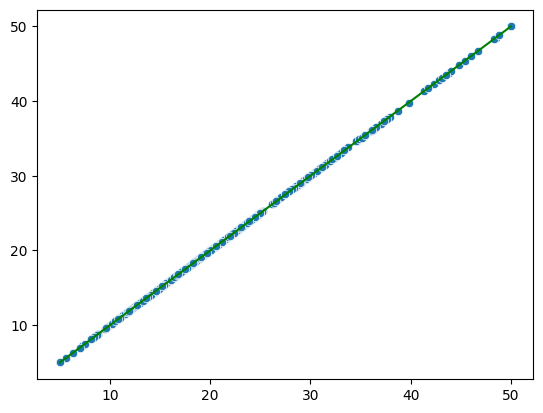

In [24]:
pipe_total = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe_total.fit(X, Y)
Y_prediction_total=pipe_total.predict(X)
sns.scatterplot(x=Y,y=Y_prediction_total)
sns.lineplot(x=Y,y=Y,color='green')

Y listo, ya tenemos un modelo que funciona perfectamente? Claramente no. Pensemos que significa asignar el número de vecinos (`n_neigbors=1`). Entrenar cada punto se selecciona el valor de su vecino mas cercano, que en este caso será el mismo.

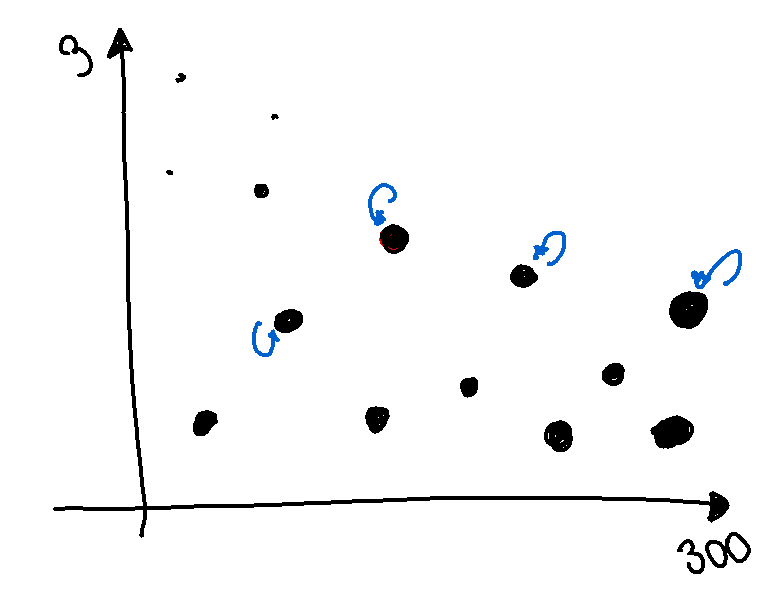

Pero claró, ¿Qué sucederá cuando intentemos predecir un valor nuevo muy lejano? Que el modelo no será capaz de generalizar y tomará el valor mas cercano.
Por tanto, generaliza fatal:
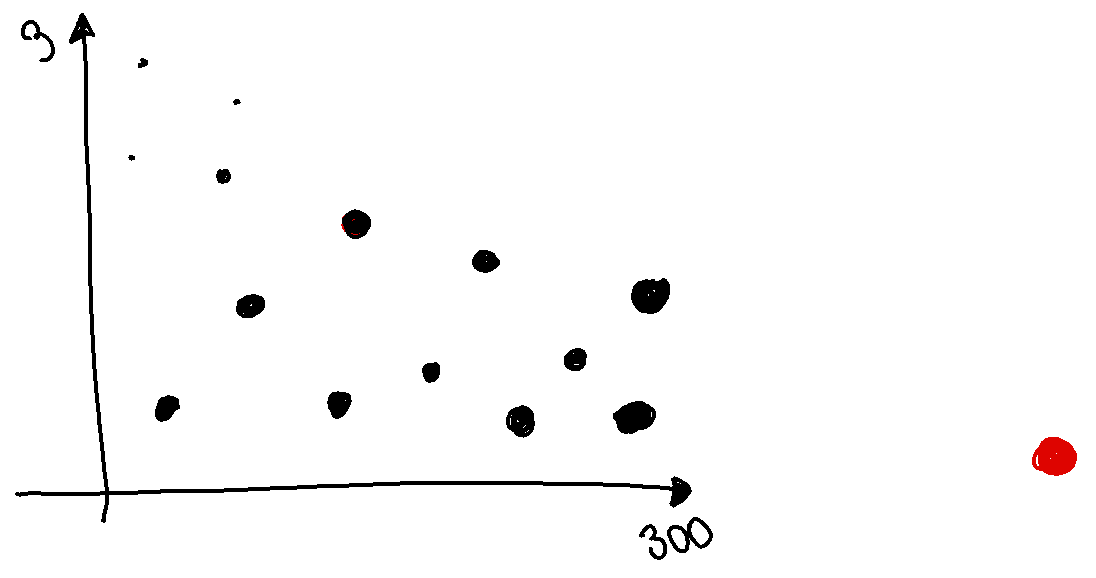


Aquí el punto debería ser gigante con todos esos metros cuadarados, pero como el vecino mas cercano del cual conoce el tamaño es el de su izquierda y n_neighbors es 1, imita su tamaño